Jeremiah Maller
Project 1
ECON 628-01
2-27-17

Conditional Cash Transfers (CCTs) and Civil Conflict in the Philippines

Abstract: What is the impact of a large conditional cash transfer (CCT) program on the level of civil-conflict-related violence in the Philippines? We address this question through the analysis of panel data gathered from 130 randomly selected villages during the phased rollout of the Pantawid Pamilya Pilipino Program from 2009-2011. We use a difference in differences estimation technique to compare the level of civil conflict in villages that received cash transfers to those that did not to identify the causal impact of the program. This is a replication study based on data from: B. Crost, J. Felter, P. Johnston, 2016. Conditional Cash Transfers, Civil Conflict and Insurgent Influence: Experimental Evidence from the Philippines, Journal of Development Economics, 118: 171-182,January 2016. The findings of this study differ from those of the original study. This study finds the conflict-decreasing impact of the intervention to be less statistically significant.


Economists remain divided on the question of whether aid has a positive or negative impact on civil conflict. Berman et al (2011) find empirical evidence that reconstruction aid administered by the US Army in Iraq led to decreased levels of insurgent violence by “winning hearts and minds.” However, empirical research by Crost et al. (2014) finds that aid spent on infrastructure projects increased conflict because it created incentives for strategic retaliation and looting in the Philippines. And Khanna and Zimmerman (2014) find that an employment program increased conflict in rural India. 
Perhaps the impact of aid on conflict depends on the form of the aid. If this is the case, then what impact do Conditional Cash Transfer (CCT) programs have on civic conflict? This is a replication of a Study by Crost et al. (2016), which sought to answer that question by exploiting the phased rollout of the Pantawid Pamilya program in one hundred and thirty randomly selected villages in the Philippines. 
The Pantawid Pamilya Pilipino Program is the flagship poverty eradication program in the Philippines. It reached over one million households by 2009 when the study period began. To qualify for the program, families must have income below the poverty line as measured by proxy means testing and children aged zero to fourteen. Children must regularly attend school, receive vaccinations, and deworming treatments. Pregnant women must receive pre- and post-natal check-ups. 
Eighty-seven percent of eligible households complied with the program’s conditions and received transfers (Fernandez and Olfindo, 2011, pp. 8-9). Half of all households in the experimental sample received cash transfers through the Pantawid Pamilya program. The maximum transfer amount is twenty-three percent of the poverty line. 
The present study undertakes a careful review of the data and estimation techniques used by Crost et al and finds that the models specified in the paper by Crost et al. are not consistent with the models specified in their Stata .do file, which was published alongside the paper at www.sciencedirect.com Furthermore, our replication results call into question the central finding of Crost et al, that Pantawid Pamilya program caused a substantial decrease in conflict incidents in treated villages in the first year of the program.

2. Data
Crost et al. (2016) retrospectively paired data on village assignment to treatment with data on the number of civil conflict incidents each month in each village to evaluate the causal impact of the CCT program on civil conflict. The Philippine Department of Social Welfare and Development (DSWD) administered the Pantawid Pamilya program and is the source for the data on assignment to treatment. 
Data on village characteristics were used as control variables in the estimation of the causal impact of this program on civil conflict. This data came from the Philippines' 2000 National Census. Table 1 compares summary statistics for control variables, such as population, the prevalence of electricity, paved streets, health clinics, and hospitals in treatment and control villages (see Table 1 for summary statistics and balance tests). 
All conflict data was recorded by the Armed Forces of the Philippines (AFP). The Philippine’s largest and most active insurgent organization during the 2001-2010 period of study was the Communist Party of the Philippines (CPP) and its armed wing, the New People’s Army (NPA). The NPA had about 7,000 fighters. Over sixty percent of the conflict incidents reported during this study involved the NPA. The average number of conflict incidents per village in the study area was .0058 per month (.07 per year). A small number of incidents does not necessarily indicate a very low intensity of conflict. Parts of Afghanistan experienced a lower number of conflict incidents per village per month from 2004-2007.


One hundred and thirty villages were randomly divided into 65 treatment villages and 65 control villages. Treatment villages received conditional cash transfers starting in 2009. Control villages did not begin receiving transfers until 2011. This study employs a difference in differences estimation technique to identify the causal impact of the the CCT program. It does this by comparing the count of monthly incidents of civil conflict in villages that received cash transfers to those villages that did not.  

In [5]:
# import data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

#import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # or 'darkgrid'

#import stats/regression packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [6]:
#import data from a stata file
df = pd.read_stata("/Users/jmaller/Desktop/ECON628-01-rjmaller/datasets/my_data/replication_data_village_incident.dta")

In [4]:
#Check for balanced panel data set
df.info()
#the panel is balanced so no missing values need to be dropped or replaced

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15600 entries, 0 to 15599
Data columns (total 22 columns):
province           15600 non-null object
municipality       15600 non-null object
barangay           15600 non-null float32
year               15600 non-null float32
month              15600 non-null float32
treat              15600 non-null float32
pop00              15600 non-null float32
streetpattern      15600 non-null float32
power              15600 non-null float32
comm_waterworks    15600 non-null float32
hospital           15600 non-null float32
clinic             15600 non-null float32
acc_natl_hwy       15600 non-null float32
incidents          15600 non-null float64
treat_dist_3       15600 non-null float64
treat_dist_5       15600 non-null float64
treat_dist_7       15600 non-null float64
control_dist_3     15600 non-null float64
control_dist_5     15600 non-null float64
control_dist_7     15600 non-null float64
totcas             15600 non-null float64
_merge     

In [7]:
#Examining the first 5 lines of my dataset
df.head(5)

,province,municipality,barangay,year,month,treat,pop00,streetpattern,power,comm_waterworks,...,acc_natl_hwy,incidents,treat_dist_3,treat_dist_5,treat_dist_7,control_dist_3,control_dist_5,control_dist_7,totcas,_merge
0,Lanao Del Norte,Lala,1.0,2001.0,1.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)
1,Lanao Del Norte,Lala,1.0,2001.0,2.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)
2,Lanao Del Norte,Lala,1.0,2001.0,3.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)
3,Lanao Del Norte,Lala,1.0,2001.0,4.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)
4,Lanao Del Norte,Lala,1.0,2001.0,5.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)


In [8]:
#Examining the last 5 lines of my dataset
df.tail(5)

,province,municipality,barangay,year,month,treat,pop00,streetpattern,power,comm_waterworks,...,acc_natl_hwy,incidents,treat_dist_3,treat_dist_5,treat_dist_7,control_dist_3,control_dist_5,control_dist_7,totcas,_merge
15595,Occidental Mindoro,Santa Cruz,130.0,2010.0,8.0,1.0,1457.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master only (1)
15596,Occidental Mindoro,Santa Cruz,130.0,2010.0,9.0,1.0,1457.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master only (1)
15597,Occidental Mindoro,Santa Cruz,130.0,2010.0,10.0,1.0,1457.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master only (1)
15598,Occidental Mindoro,Santa Cruz,130.0,2010.0,11.0,1.0,1457.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master only (1)
15599,Occidental Mindoro,Santa Cruz,130.0,2010.0,12.0,1.0,1457.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master only (1)


In [9]:
#Generate basic descriptive summary statistics for all variables in the data set
#Transposing the table makes it easier to visualize summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
barangay,15600.0,65.500000,37.524776,1.0,33.00,65.5,98.00,130.0
year,15600.0,2005.453125,2.872634,2001.0,2003.00,2005.5,2008.00,2010.0
month,15600.0,6.500000,3.452163,1.0,3.75,6.5,9.25,12.0
treat,15600.0,0.500000,0.500016,0.0,0.00,0.5,1.00,1.0
pop00,15600.0,1446.995850,1262.891602,183.0,659.00,1137.5,1757.00,10015.0
streetpattern,15600.0,0.269231,0.443581,0.0,0.00,0.0,1.00,1.0
power,15600.0,0.607692,0.488285,0.0,0.00,1.0,1.00,1.0
comm_waterworks,15600.0,0.161538,0.368056,0.0,0.00,0.0,0.00,1.0
hospital,15600.0,0.038462,0.192296,0.0,0.00,0.0,0.00,1.0
clinic,15600.0,0.476923,0.499511,0.0,0.00,0.0,1.00,1.0


In [10]:
#summary table showing mean number of incidents and mean number of total casualties for treatment and control groups
df.groupby(['treat'], sort=True)[['incidents', 'totcas']].mean().sort_values(by=['incidents'], ascending=False).reset_index()


,treat,incidents,totcas
0,0.0,0.006538,0.001154
1,1.0,0.006538,0.003718


In [11]:
#balancing table showing mean value of control variables for treatment and control groups (sorted by municipality)
df.groupby(['municipality','treat'], sort=True)[['pop00', 'streetpattern', 'power', 'comm_waterworks', 'hospital', 'clinic', 'acc_natl_hwy']].mean().reset_index()

,municipality,treat,pop00,streetpattern,power,comm_waterworks,hospital,clinic,acc_natl_hwy
0,Basay,0.0,2730.800049,0.400000,0.800000,0.400000,0.000000,1.000000,0.800000
1,Basay,1.0,1542.400024,0.000000,0.000000,0.600000,0.000000,0.800000,0.400000
2,Jimalalud,0.0,1037.307739,0.230769,0.230769,0.000000,0.076923,0.153846,0.769231
3,Jimalalud,1.0,884.733337,0.000000,0.333333,0.000000,0.000000,0.266667,0.533333
4,Lala,0.0,1434.928589,0.357143,1.000000,0.071429,0.000000,0.714286,0.642857
5,Lala,1.0,2796.769287,0.384615,1.000000,0.076923,0.076923,0.769231,0.923077
6,Paluan,0.0,1048.500000,0.833333,1.000000,0.000000,0.000000,0.666667,0.000000
7,Paluan,1.0,955.333313,0.833333,0.666667,0.000000,0.000000,0.500000,0.000000
8,Paracelis,0.0,1892.800049,0.200000,0.600000,0.000000,0.000000,0.000000,0.400000
9,Paracelis,1.0,2380.250000,0.250000,0.500000,0.000000,0.250000,0.250000,0.500000


In [12]:
#balancing table check of mean, variance, and standard deviation of population subsetted for treatment and control group
func_tuples = [('Median', np.mean), ('Variance', np.var), ('Standard Deviation', np.std)]
df.groupby(['treat'])[['pop00']].agg(func_tuples).reset_index()

treat        pop00                                 
              Median      Variance Standard Deviation
0   0.0  1419.492310  9.856279e+05         992.787964
1   1.0  1474.584595  2.202852e+06        1484.200928

In [13]:
#Using a mask to generate the mean of variables for a specific year (2002)
mask_2002=df['year']== 2002
df_2002=df[mask_2002]
df_2002.mean()

barangay             65.500000
year               2002.000000
month                 6.500000
treat                 0.500000
pop00              1447.038462
streetpattern         0.269231
power                 0.607692
comm_waterworks       0.161538
hospital              0.038462
clinic                0.476923
acc_natl_hwy          0.500000
incidents             0.001923
treat_dist_3          2.730769
treat_dist_5          5.646154
treat_dist_7          8.046154
control_dist_3        2.530769
control_dist_5        5.184615
control_dist_7        7.446154
totcas                0.000641
dtype: float64

In [14]:
#Using a mask to generate the mean of variables for a specific year (2003)
mask_2003=df['year']== 2003
df_2003=df[mask_2003]
df_2003.mean()

barangay             65.500000
year               2003.000000
month                 6.500000
treat                 0.500000
pop00              1447.038462
streetpattern         0.269231
power                 0.607692
comm_waterworks       0.161538
hospital              0.038462
clinic                0.476923
acc_natl_hwy          0.500000
incidents             0.001282
treat_dist_3          2.730769
treat_dist_5          5.646154
treat_dist_7          8.046154
control_dist_3        2.530769
control_dist_5        5.184615
control_dist_7        7.446154
totcas                0.001282
dtype: float64

In [16]:
#Using a mask to generate the mean of variables for a specific year (2004)
mask_2004=df['year']== 2004
df_2004=df[mask_2004]
df_2004.mean()

barangay             65.500000
year               2004.000000
month                 6.500000
treat                 0.500000
pop00              1447.038462
streetpattern         0.269231
power                 0.607692
comm_waterworks       0.161538
hospital              0.038462
clinic                0.476923
acc_natl_hwy          0.500000
incidents             0.010897
treat_dist_3          2.730769
treat_dist_5          5.646154
treat_dist_7          8.046154
control_dist_3        2.530769
control_dist_5        5.184615
control_dist_7        7.446154
totcas                0.001923
dtype: float64

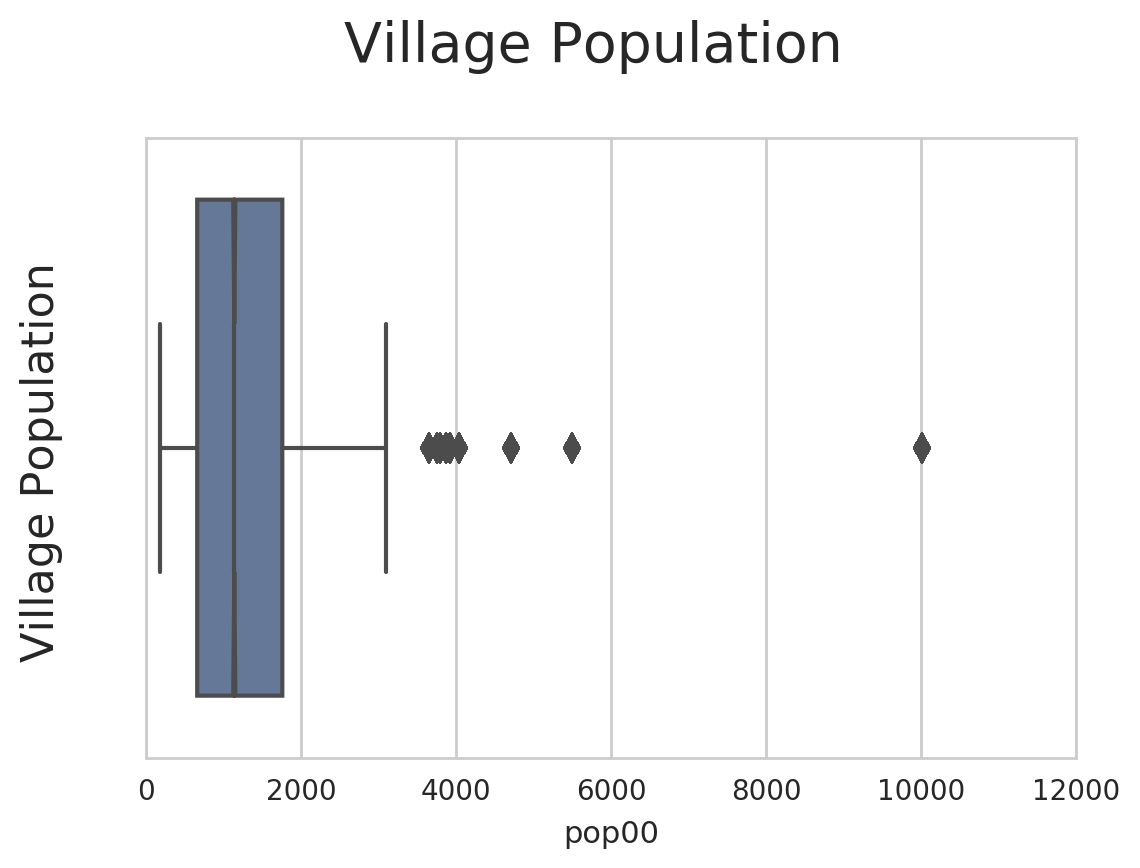

In [15]:
#Identifying outliers in the data using boxplot diagrams
#Identifying outliers for village population using boxplot diagrams

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
sns.boxplot(df.pop00   , orient='h',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)
ax.set_ylabel('Village Population  \n', fontsize=16)
ax.set_title('Village Population  \n', fontsize=20)
plt.show()

In [17]:
#Generate histogram funciton. We will use to vizualize individual variables
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
#     dist = sns.distplot(data, kde=False, bins=30)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

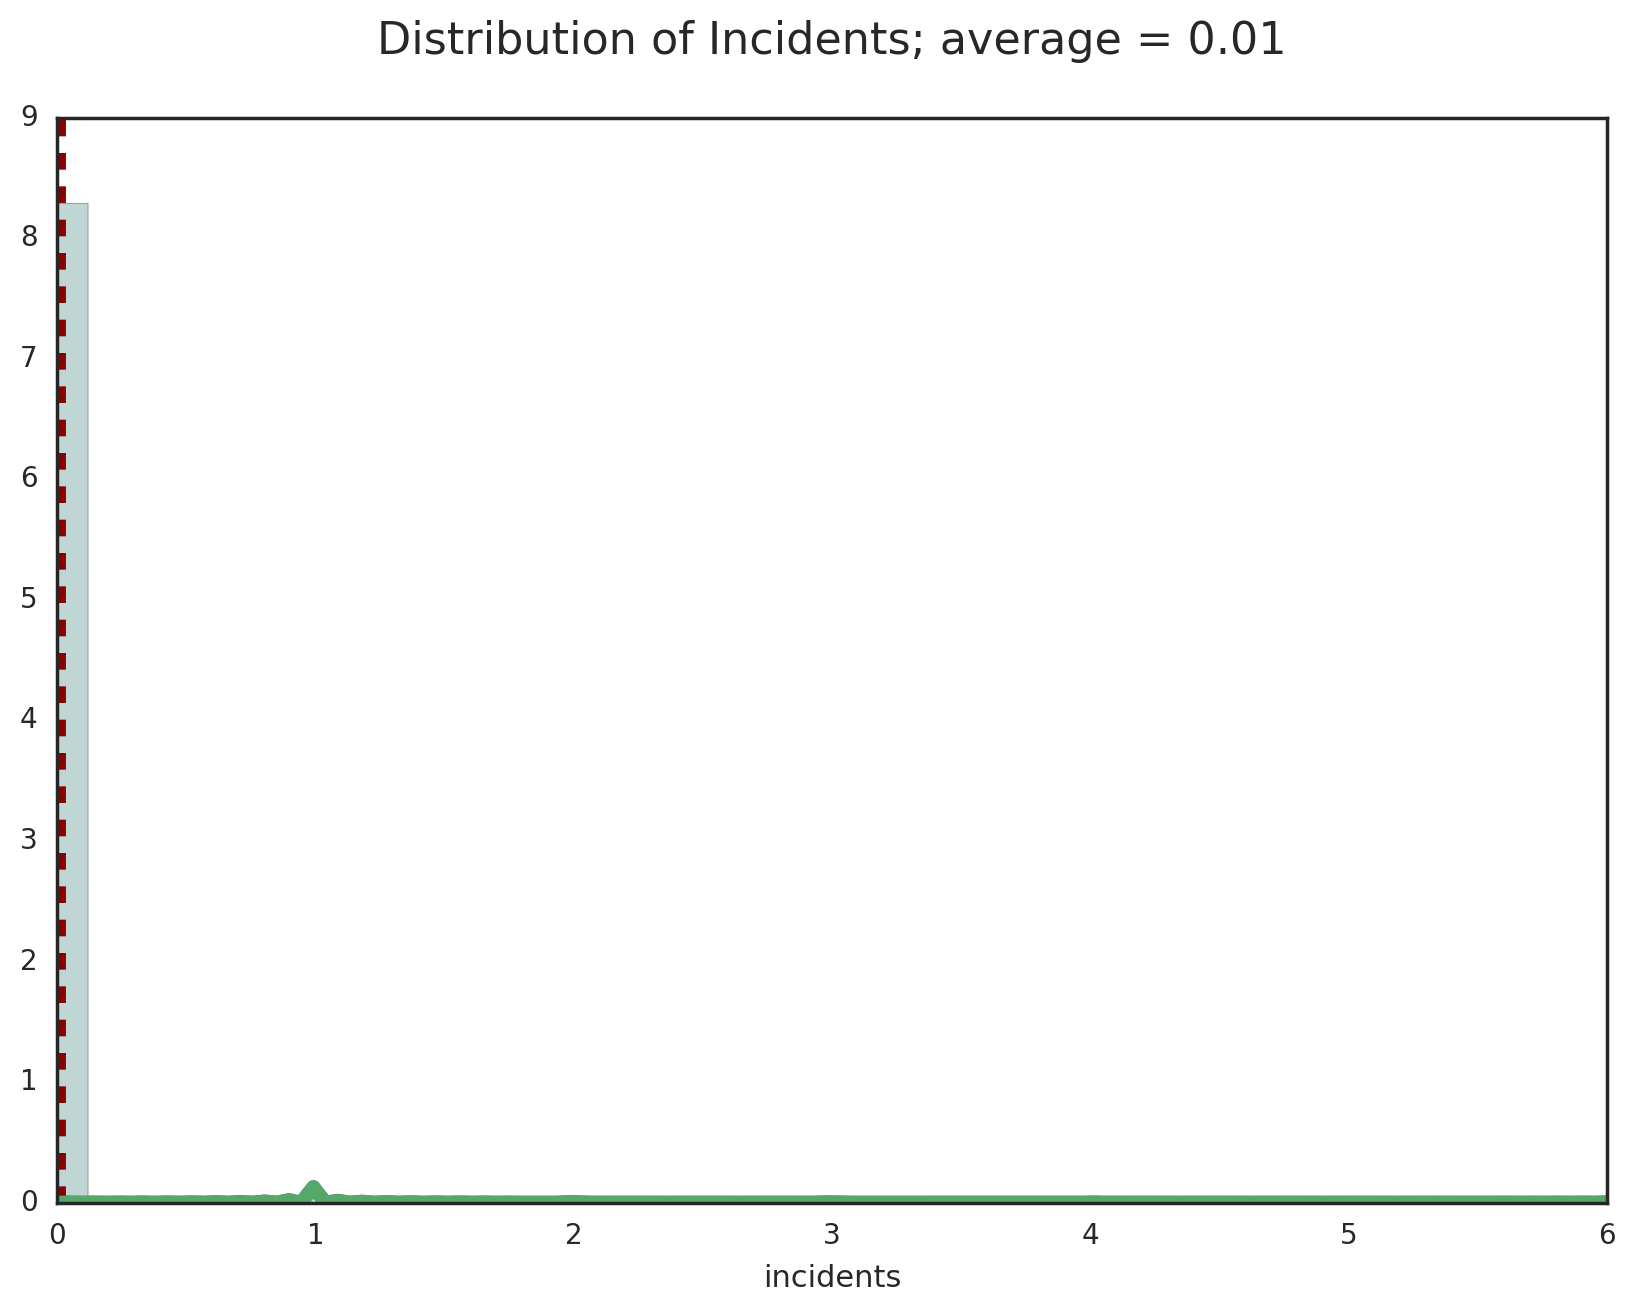

In [18]:
histogram_plotter("Incidents", df.incidents)
# We conclude that most observations at the village month level record zero violent incidents

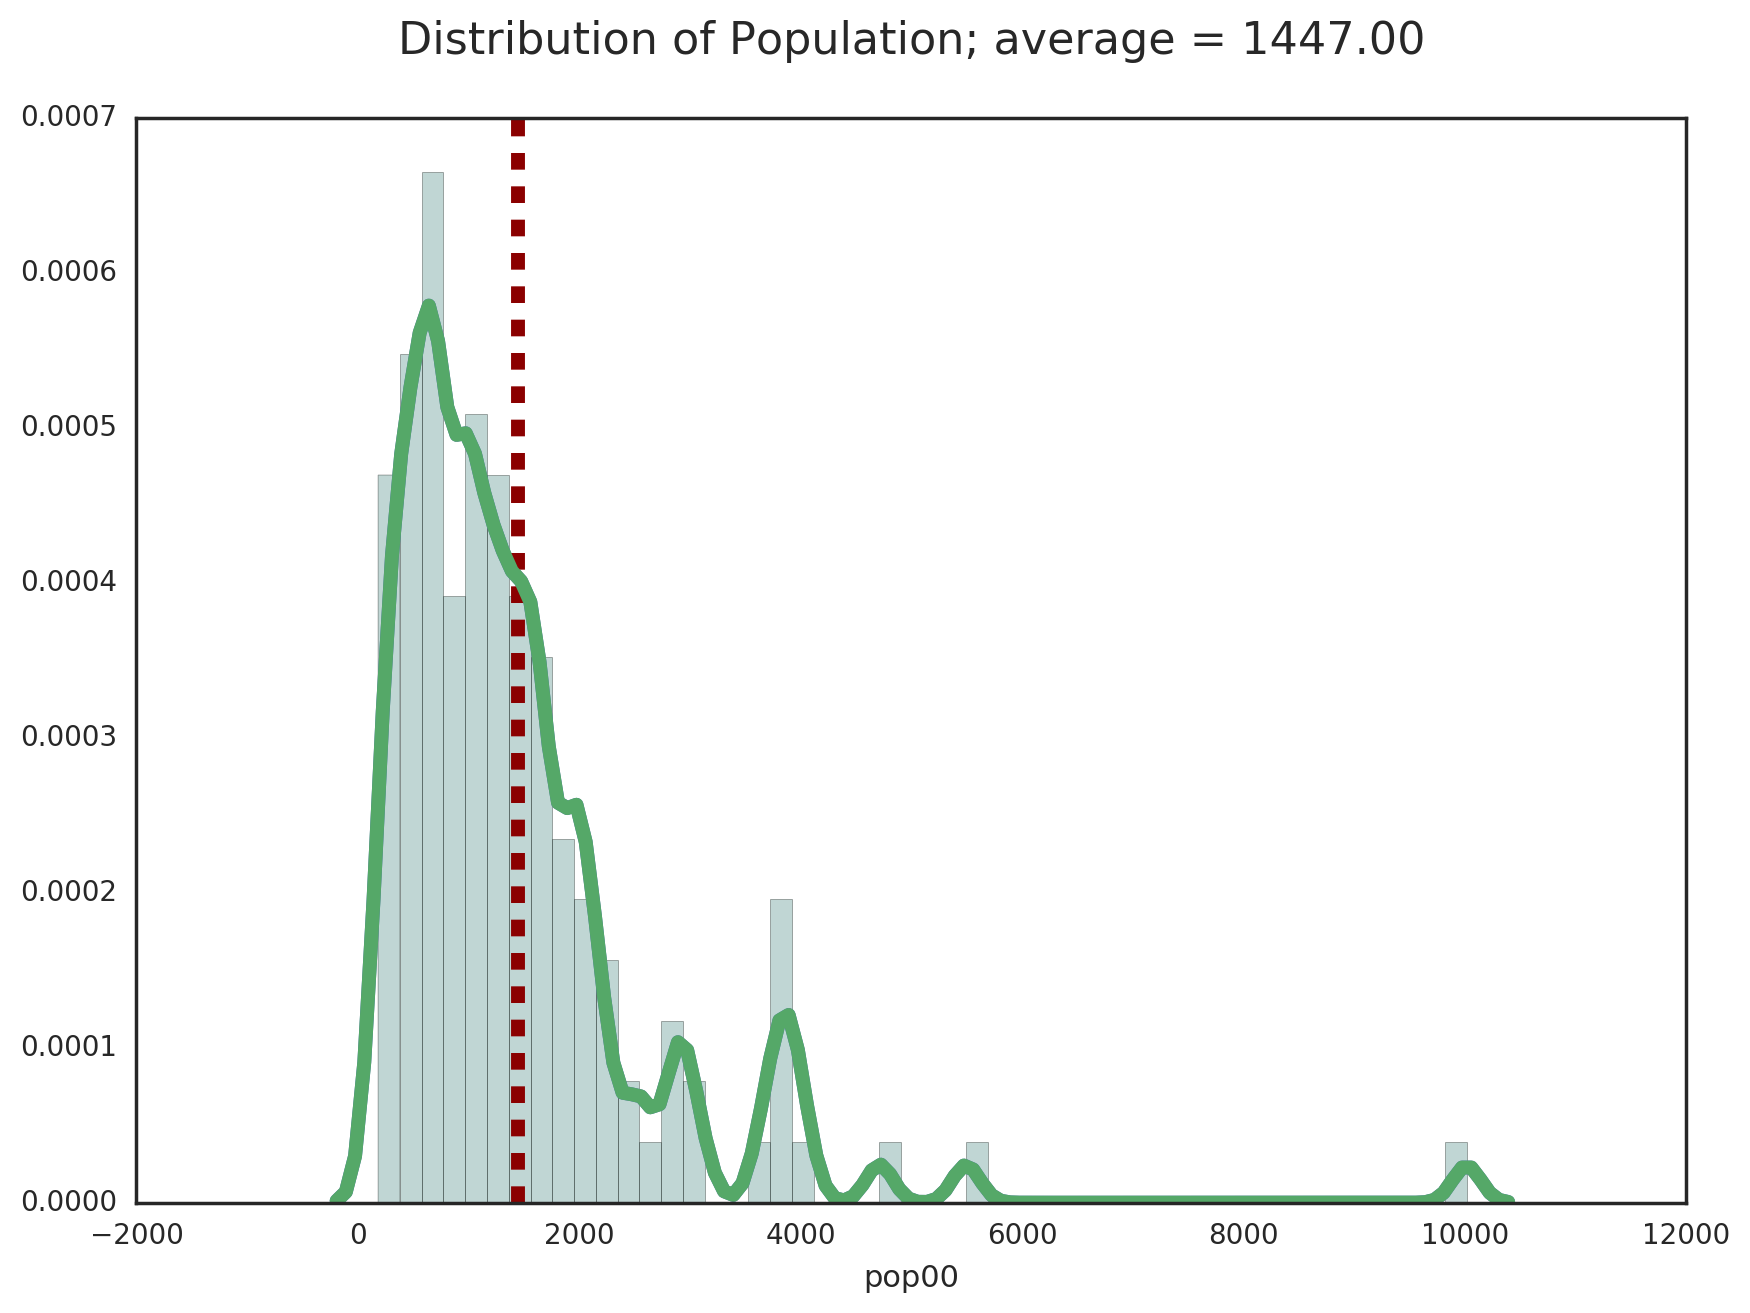

In [19]:
histogram_plotter("Population", df.pop00)
# The distribution of village population is skewed to the right. 

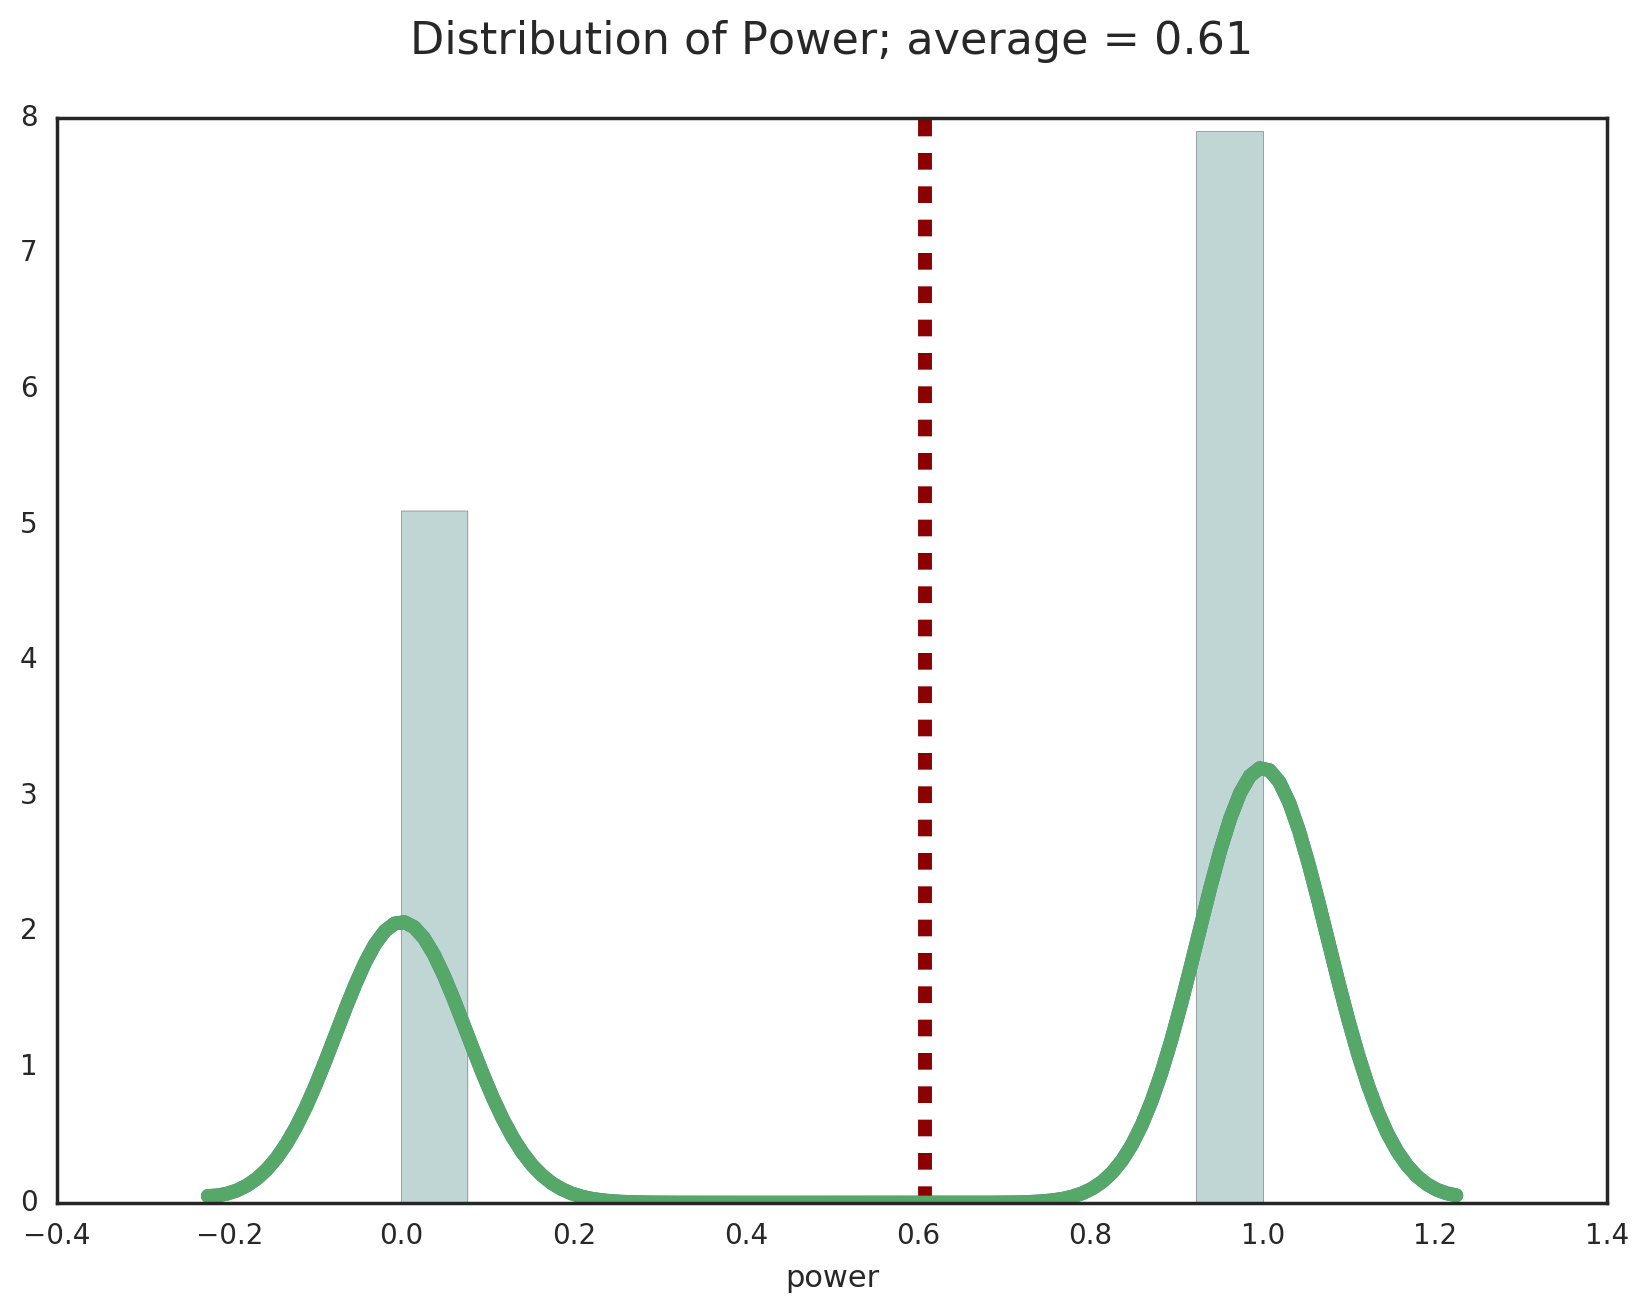

In [20]:
histogram_plotter("Power", df.power)

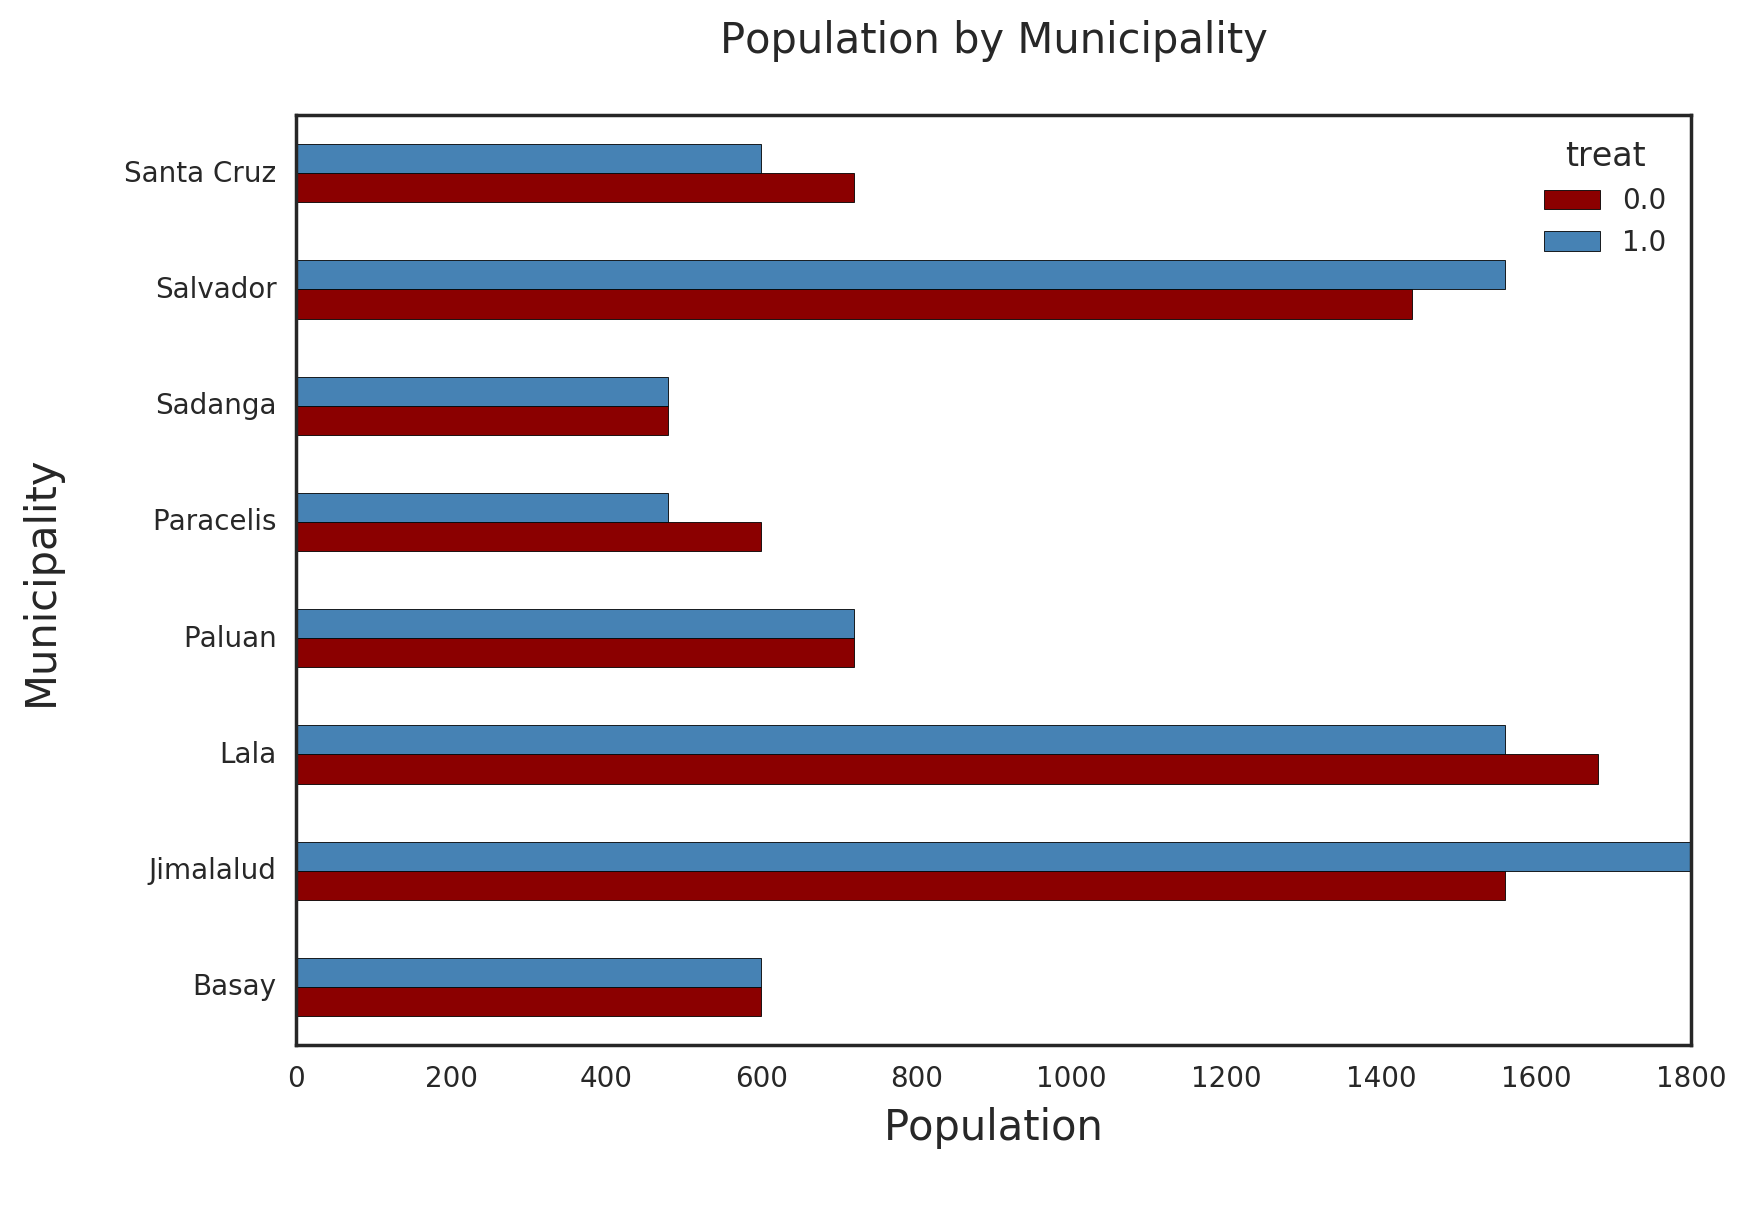

In [21]:
#Visualizing population by municipality subsetted for the treatment and control groups
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
df.groupby(['municipality','treat']).size().unstack().plot( kind="barh", color=['darkred', 'steelblue'], ax=ax)
plt.title('Population by Municipality\n', fontsize = 15)
plt.ylabel('Municipality\n', fontsize=15)
plt.xlabel('Population\n', fontsize=15)
plt.show()

/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


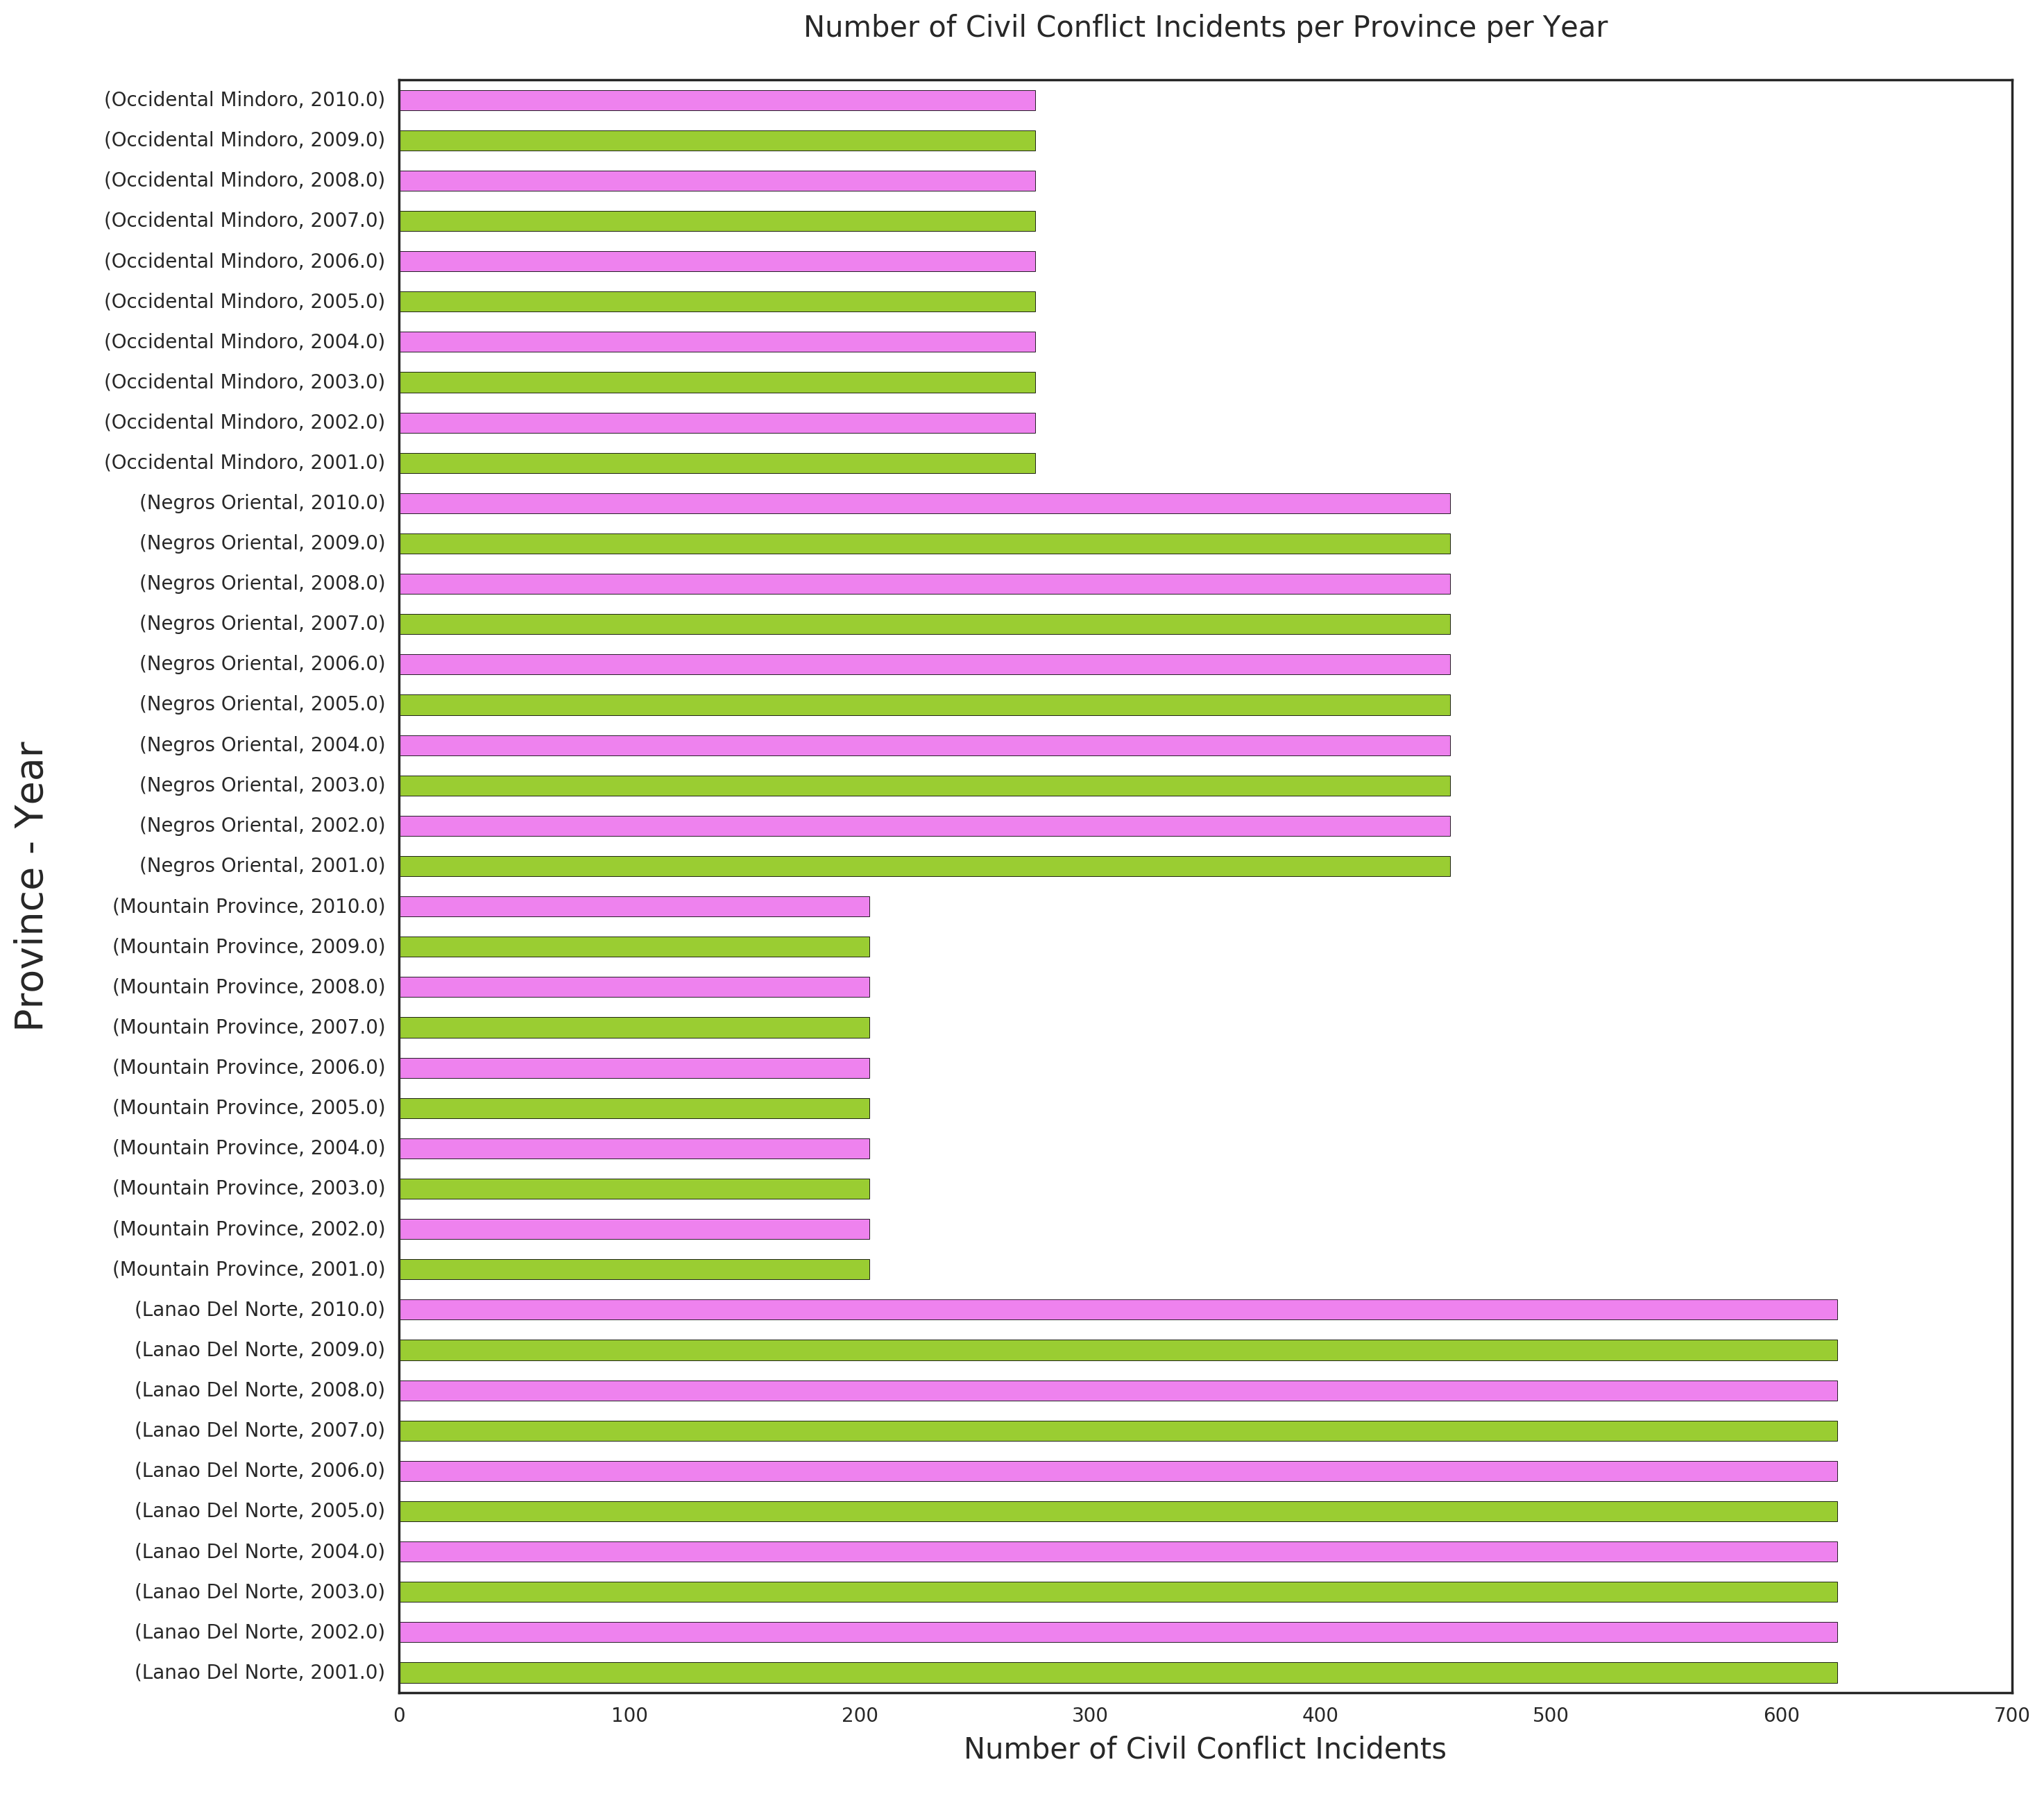

In [22]:
#Visualizing number of Civil Conflict Incident per Province Per Year
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.groupby(['province', 'year']).size().plot(kind="barh", colors=['yellowgreen', 'violet'], ax=ax)
plt.title('Number of Civil Conflict Incidents per Province per Year\n', fontsize = 15)
plt.ylabel('Province - Year\n', fontsize=20)
plt.xlabel('Number of Civil Conflict Incidents\n', fontsize=15)
plt.show()

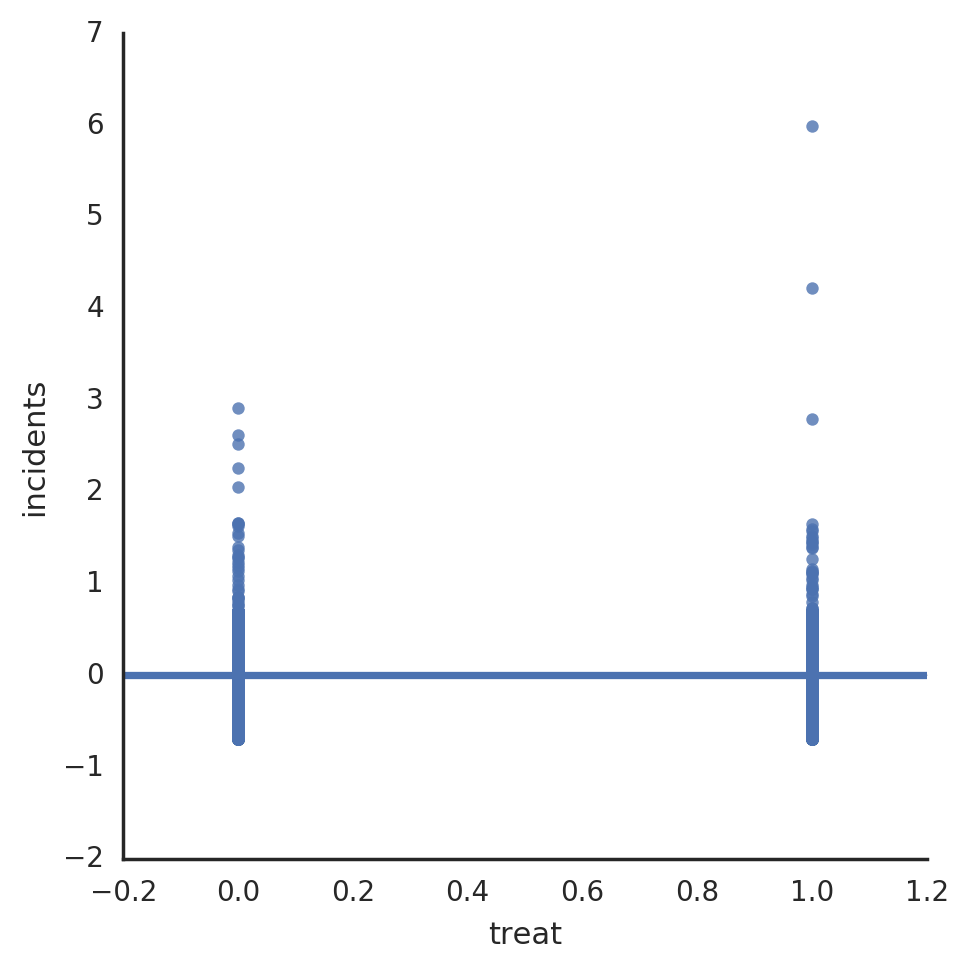

In [27]:
# simple OLS linear regression visualization
# we are regressing the number of violent incidents on the dummy treatment variable 
# to isolate the average treatment effect
sns.lmplot(x="treat", y="incidents", data = df, y_jitter = .)

The most accurate estimate of the average treatment effect of the Pantawid Pamilya program is likely yielded by Eq. (2d), the Difference-in-Differences estimate which controls for unit and municipality-by-month fixed effects and has cluster robust standard errors at the village-year level (see Table 2). Cluster-robust standard errors correct for any serial auto-correlation across time or at the unit (village) level. Bias is minimized by controlling for unit and municipality-by-month fixed effects. It appears that cash transfers caused a decrease in conflict-related incidents in treatment villages relative to control villages in the first nine months of the Pantawid Pamilya program in the Philippines. However, the sensitivity of these various estimates to alternative specifications calls the statistical significance of the average treatment effect into question. Randomized controlled trials replicating this study would need to be carried out in many places all around the world under a wide variety of conditions before any meaningful generalizations could be made about the efficacy of conditional cash transfer programs in decreasing civil conflict.